In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('songs.csv')
df.head(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [4]:
df = df[df['year'] > 2002]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35656 entries, 6354 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      35656 non-null  float64
 1   artists           35656 non-null  object 
 2   danceability      35656 non-null  float64
 3   duration_ms       35656 non-null  int64  
 4   energy            35656 non-null  float64
 5   explicit          35656 non-null  int64  
 6   id                35656 non-null  object 
 7   instrumentalness  35656 non-null  float64
 8   key               35656 non-null  int64  
 9   liveness          35656 non-null  float64
 10  loudness          35656 non-null  float64
 11  mode              35656 non-null  int64  
 12  name              35656 non-null  object 
 13  popularity        35656 non-null  int64  
 14  release_date      35656 non-null  object 
 15  speechiness       35656 non-null  float64
 16  tempo             35656 non-null  fl

In [5]:
df.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.306,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.270,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.153,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.472,2020
169908,0.1090,['Ingrid Andress'],0.512,214787,0.428,0,60RFlt48hm0l4Fu0JoccOl,0.000000,0,0.1050,-7.387,1,More Hearts Than Mine,65,2020-03-27,0.0271,80.588,0.366,2020


In [6]:
df['name'].value_counts()

Home                        24
You                         17
Stay                        17
Forever                     17
Heaven                      15
                            ..
MANiCURE                     1
Aloha Ke Akua                1
80's Comedown Machine        1
Idgaf (feat. Will Claye)     1
How Would I Know             1
Name: name, Length: 30096, dtype: int64

In [7]:
df[df['name'] == 'Home']

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
39372,0.745000,['Gabrielle Aplin'],0.425,247002,0.2730,0,3X01VeoR0GckfiXlFRrJmF,0.000000,11,0.0930,-10.712,0,Home,64,2012-01-09,0.0355,137.994,0.3650,2012
39667,0.479000,['Blake Shelton'],0.380,230453,0.4430,0,3oTC5qoKq6nvz4Jj0DgCzF,0.000003,7,0.1100,-6.972,1,Home,54,2015-10-23,0.0268,63.122,0.2810,2015
39939,0.006080,"['Vince Staples', 'Richie Kohan']",0.604,211360,0.7360,0,7pBsquIkbED6W6uSQJGbkn,0.109000,10,0.1100,-5.596,0,Home,63,2018-12-14,0.0555,118.012,0.3450,2018
39947,0.839000,['Medasin'],0.660,194547,0.4500,0,42NB7w0tDCag0mQpCtZe7Y,0.714000,4,0.3740,-11.011,1,Home,60,2018-08-10,0.0451,145.011,0.2420,2018
40084,0.387000,['Cavetown'],0.532,269897,0.4740,0,3XRALl9CNCnjjbCZid2L9w,0.000085,1,0.1100,-5.223,1,Home,64,2019-06-07,0.0372,124.860,0.2810,2019
46789,0.368000,['Zach Deputy'],0.619,227320,0.6600,0,1MlYluBz3FzbRRQVy5N01b,0.000000,7,0.4320,-5.735,1,Home,41,2008,0.0873,76.964,0.5250,2008
47432,0.235000,['Johnnyswim'],0.647,211107,0.6270,0,2BX2njwutbKutDcLVFiqUU,0.000000,0,0.1440,-7.080,1,Home,50,2014-04-29,0.0756,110.121,0.5170,2014
47588,0.036300,['Chris Tomlin'],0.468,219720,0.7860,0,2aMb1asq5acm7cDYlFsYhY,0.000000,9,0.3100,-2.757,1,Home,54,2016-10-21,0.0334,84.992,0.4610,2016
62512,0.946000,"[""Dustin O'Halloran""]",0.327,160812,0.0733,0,7eTDwpm5XKKssoMhMbo67y,0.913000,9,0.3390,-20.667,0,Home,56,2013-05-02,0.0400,137.139,0.0384,2013
69773,0.266000,['Daughter'],0.677,258973,0.4250,0,7ndgQ4LPJwaF4o6QHLaq9i,0.161000,7,0.1180,-11.845,0,Home,45,2012-01-01,0.0259,103.602,0.2520,2012


In [8]:
df.drop_duplicates(subset = ['name'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30096 entries, 6354 to 169906
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      30096 non-null  float64
 1   artists           30096 non-null  object 
 2   danceability      30096 non-null  float64
 3   duration_ms       30096 non-null  int64  
 4   energy            30096 non-null  float64
 5   explicit          30096 non-null  int64  
 6   id                30096 non-null  object 
 7   instrumentalness  30096 non-null  float64
 8   key               30096 non-null  int64  
 9   liveness          30096 non-null  float64
 10  loudness          30096 non-null  float64
 11  mode              30096 non-null  int64  
 12  name              30096 non-null  object 
 13  popularity        30096 non-null  int64  
 14  release_date      30096 non-null  object 
 15  speechiness       30096 non-null  float64
 16  tempo             30096 non-null  fl

In [10]:
df[df['name'] == 'Home']

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
39372,0.745,['Gabrielle Aplin'],0.425,247002,0.273,0,3X01VeoR0GckfiXlFRrJmF,0.0,11,0.093,-10.712,0,Home,64,2012-01-09,0.0355,137.994,0.365,2012


In [11]:
names = df['name']
names

6354                            How Am I Doin'
6355                               Be With You
6356                 Champagne & Reefer - Live
6357                                   Coqueta
6358                                 Tu Mirada
                          ...                 
169901    Letter To Nipsey (feat. Roddy Ricch)
169903                         Ojos De Maniaco
169904           Skechers (feat. Tyga) - Remix
169905          Sweeter (feat. Terrace Martin)
169906                        How Would I Know
Name: name, Length: 30096, dtype: object

In [12]:
features = ['danceability', 'energy', 'valence', 'loudness']
X = MinMaxScaler().fit_transform(df[features])
kmeans = KMeans(init="k-means++", n_clusters=4, random_state=15).fit(X)

In [13]:
df['kmeans'] = kmeans.labels_
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,kmeans
6354,0.1250,['Dierks Bentley'],0.528,228438,0.871,0,3bvr2R5FUjrC3orh47Qe5V,0.000000,9,0.2300,-8.010,1,How Am I Doin',42,2003-01-01,0.1220,181.903,0.675,2003,2
6355,0.1250,['Beyoncé'],0.711,260200,0.454,0,1qgNiHh7QoSgzoFZEPwPNm,0.000002,0,0.0710,-6.485,0,Be With You,43,2003-06-24,0.0904,74.928,0.782,2003,2
6356,0.3310,['Muddy Waters'],0.333,292373,0.603,0,2PatEYrrVBNx5LPjTL2ruP,0.026800,0,0.9820,-8.339,1,Champagne & Reefer - Live,47,2003-09-02,0.1760,207.800,0.525,2003,3
6357,0.1230,['Los Nietos'],0.790,238120,0.526,0,27188WhdFnBQXf1MzjIIAS,0.000000,11,0.0835,-6.978,1,Coqueta,50,2003-01-01,0.0280,94.872,0.748,2003,2
6358,0.1180,"[""Los Player's""]",0.526,149420,0.682,0,34AiUmehAG6OuMpa3efrZg,0.000058,11,0.5170,-6.392,1,Tu Mirada,43,2003-01-01,0.0363,140.395,0.894,2003,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169901,0.2640,"['Meek Mill', 'Roddy Ricch']",0.744,167845,0.702,1,0j2CNrgtalXRGIvHMO2vzh,0.000000,7,0.1200,-6.255,0,Letter To Nipsey (feat. Roddy Ricch),66,2020-01-27,0.2880,91.885,0.338,2020,0
169903,0.2100,"['LEGADO 7', 'Junior H']",0.795,218501,0.585,0,52Cpyvd2dKb6XRn313nH87,0.000001,8,0.1120,-4.451,1,Ojos De Maniaco,68,2020-02-28,0.0374,97.479,0.934,2020,2
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.306,2020,0
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.270,2020,0


In [14]:
df['kmeans'].value_counts()

2    10623
0     8261
3     7813
1     3399
Name: kmeans, dtype: int64

In [15]:
df['song_name']=names
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,mode,name,popularity,release_date,speechiness,tempo,valence,year,kmeans,song_name
6354,0.1250,['Dierks Bentley'],0.528,228438,0.871,0,3bvr2R5FUjrC3orh47Qe5V,0.000000,9,0.2300,...,1,How Am I Doin',42,2003-01-01,0.1220,181.903,0.675,2003,2,How Am I Doin'
6355,0.1250,['Beyoncé'],0.711,260200,0.454,0,1qgNiHh7QoSgzoFZEPwPNm,0.000002,0,0.0710,...,0,Be With You,43,2003-06-24,0.0904,74.928,0.782,2003,2,Be With You
6356,0.3310,['Muddy Waters'],0.333,292373,0.603,0,2PatEYrrVBNx5LPjTL2ruP,0.026800,0,0.9820,...,1,Champagne & Reefer - Live,47,2003-09-02,0.1760,207.800,0.525,2003,3,Champagne & Reefer - Live
6357,0.1230,['Los Nietos'],0.790,238120,0.526,0,27188WhdFnBQXf1MzjIIAS,0.000000,11,0.0835,...,1,Coqueta,50,2003-01-01,0.0280,94.872,0.748,2003,2,Coqueta
6358,0.1180,"[""Los Player's""]",0.526,149420,0.682,0,34AiUmehAG6OuMpa3efrZg,0.000058,11,0.5170,...,1,Tu Mirada,43,2003-01-01,0.0363,140.395,0.894,2003,2,Tu Mirada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169901,0.2640,"['Meek Mill', 'Roddy Ricch']",0.744,167845,0.702,1,0j2CNrgtalXRGIvHMO2vzh,0.000000,7,0.1200,...,0,Letter To Nipsey (feat. Roddy Ricch),66,2020-01-27,0.2880,91.885,0.338,2020,0,Letter To Nipsey (feat. Roddy Ricch)
169903,0.2100,"['LEGADO 7', 'Junior H']",0.795,218501,0.585,0,52Cpyvd2dKb6XRn313nH87,0.000001,8,0.1120,...,1,Ojos De Maniaco,68,2020-02-28,0.0374,97.479,0.934,2020,2,Ojos De Maniaco
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,...,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.306,2020,0,Skechers (feat. Tyga) - Remix
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,...,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.270,2020,0,Sweeter (feat. Terrace Martin)


In [16]:
cluster=df.groupby(by=df['kmeans'])
cluster

In [17]:
y=df.pop('kmeans')

In [18]:
y

6354      2
6355      2
6356      3
6357      2
6358      2
         ..
169901    0
169903    2
169904    0
169905    0
169906    0
Name: kmeans, Length: 30096, dtype: int32

In [19]:
x = df.drop(columns=['name','artists','id','release_date','song_name'])
x

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
6354,0.1250,0.528,228438,0.871,0,0.000000,9,0.2300,-8.010,1,42,0.1220,181.903,0.675,2003
6355,0.1250,0.711,260200,0.454,0,0.000002,0,0.0710,-6.485,0,43,0.0904,74.928,0.782,2003
6356,0.3310,0.333,292373,0.603,0,0.026800,0,0.9820,-8.339,1,47,0.1760,207.800,0.525,2003
6357,0.1230,0.790,238120,0.526,0,0.000000,11,0.0835,-6.978,1,50,0.0280,94.872,0.748,2003
6358,0.1180,0.526,149420,0.682,0,0.000058,11,0.5170,-6.392,1,43,0.0363,140.395,0.894,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169901,0.2640,0.744,167845,0.702,1,0.000000,7,0.1200,-6.255,0,66,0.2880,91.885,0.338,2020
169903,0.2100,0.795,218501,0.585,0,0.000001,8,0.1120,-4.451,1,68,0.0374,97.479,0.934,2020
169904,0.1730,0.875,163800,0.443,1,0.000032,1,0.0891,-7.461,1,75,0.1430,100.012,0.306,2020
169905,0.0167,0.719,167468,0.385,0,0.031300,8,0.1110,-10.907,1,64,0.0403,128.000,0.270,2020


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [21]:
from lightgbm import LGBMClassifier
model=LGBMClassifier().fit(x_train,y_train)

In [22]:
model.score(x_train,y_train)

1.0

In [23]:
model.score(x_test,y_test)

0.9871079213184476

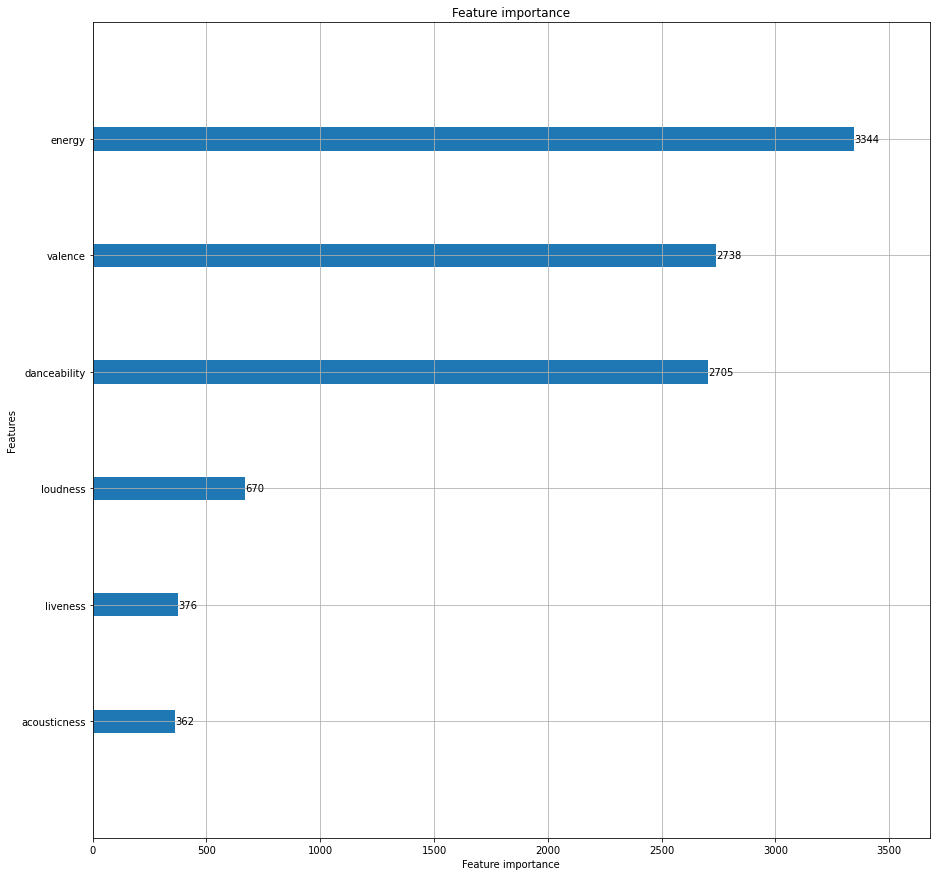

In [24]:
import lightgbm
import matplotlib.pyplot as plt
ax = lightgbm.plot_importance(model, max_num_features=6, figsize=(15,15))
plt.show()

In [25]:
data = cluster.apply(lambda x: x.sort_values(["popularity"],ascending=False))
data.reset_index(level=0, inplace=True)

In [26]:
data

,kmeans,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,...,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,song_name
87949,0,0.73100,"['Powfu', 'beabadoobee']",0.726,173333,0.431,0,7eJMfftS33KTjuF7lTsMCx,0.000000,8,...,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,0.1350,144.026,0.348,2020,death bed (coffee for your head) (feat. beabad...
87941,0,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.537,1,39Yp9wwQiSRIDOvrVg7mbk,0.000000,0,...,-7.648,0,THE SCOTTS,96,2020-04-24,0.0514,129.979,0.280,2020,THE SCOTTS
87858,0,0.69200,['Tones And I'],0.824,209438,0.588,0,2XU0oxnq2qxCpomAAuJY8K,0.000104,6,...,-6.400,0,Dance Monkey,94,2019-10-17,0.0924,98.027,0.513,2019,Dance Monkey
87951,0,0.02640,['6ix9ine'],0.611,132303,0.688,1,4NhDYoQTYCdWHTvlbGVgwo,0.000000,1,...,-5.688,1,GOOBA,94,2020-05-08,0.3410,178.462,0.393,2020,GOOBA
87953,0,0.22300,"['Ariana Grande', 'Justin Bieber']",0.597,228482,0.450,0,4HBZA5flZLE435QTztThqH,0.000000,8,...,-6.658,1,Stuck with U (with Justin Bieber),94,2020-05-08,0.0418,178.765,0.537,2020,Stuck with U (with Justin Bieber)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16216,3,0.30500,['Arijit Singh'],0.511,274687,0.752,0,3xuUW0IwM2VbVgZSbVORzR,0.000000,4,...,-4.857,0,"Ik Vaari Aa (From ""Raabta"")",0,2020-06-16,0.0535,127.960,0.428,2020,"Ik Vaari Aa (From ""Raabta"")"
16214,3,0.61300,['Arijit Singh'],0.405,287422,0.664,0,0vv7WPmdbL3fkN8UsiiFqh,0.000001,4,...,-5.497,1,"Phir Kabhi (From ""M.S.Dhoni - The Untold Story"")",0,2020-06-16,0.0328,81.924,0.400,2020,"Phir Kabhi (From ""M.S.Dhoni - The Untold Story"")"
16200,3,0.01290,"['Wisin & Yandel', 'Jennifer Lopez']",0.717,238200,0.939,0,6gV0i9vpiAYM5dN9Jur01A,0.000082,5,...,-2.525,0,Follow The Leader,0,2020-06-05,0.1610,123.130,0.440,2020,Follow The Leader
16198,3,0.00291,"['Wisin & Yandel', 'Chris Brown', 'T-Pain']",0.626,274947,0.769,0,2IYvL7lWVMVdxbShD9hdXv,0.000000,11,...,-5.296,0,Algo Me Gusta De Ti,0,2020-06-05,0.0325,127.949,0.237,2020,Algo Me Gusta De Ti


In [27]:
data[data['song_name'] == 'See You Again']

,kmeans,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,...,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,song_name
96521,2,0.0149,['Miley Cyrus'],0.692,190453,0.911,0,0G71WvIkF2K6HViJeFvOcM,0.000073,9,...,-5.098,0,See You Again,59,2007-01-01,0.177,138.975,0.801,2007,See You Again


In [28]:
data[(data['kmeans'] == 3) & (data['popularity'] > 69)& (data['song_name'] != 'NaN')].describe()

,kmeans,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,440.0,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,3.0,0.119581,0.532257,220848.979545,0.797432,0.243182,0.033601,5.081818,0.209872,-5.127873,0.609091,73.784091,0.097188,126.880402,0.388604,2015.822727
std,0.0,0.155193,0.134804,48241.970092,0.094266,0.429492,0.163560,3.560430,0.167262,2.607406,0.488510,3.675471,0.094832,31.001928,0.143107,4.482355
min,3.0,0.000071,0.000000,87874.000000,0.557000,0.000000,0.000000,0.000000,0.024300,-27.250000,0.000000,70.000000,0.000000,0.000000,0.000000,2003.000000
25%,3.0,0.011350,0.459000,193017.000000,0.725000,0.000000,0.000000,2.000000,0.102000,-5.834250,0.000000,71.000000,0.042475,103.045500,0.298000,2014.000000
50%,3.0,0.051800,0.547500,215114.000000,0.798500,0.000000,0.000000,5.000000,0.142000,-4.804500,1.000000,73.000000,0.062400,125.773000,0.398000,2018.000000
75%,3.0,0.176000,0.622250,237879.750000,0.868000,0.000000,0.000030,8.000000,0.274500,-3.764750,1.000000,76.000000,0.106250,149.570000,0.495000,2019.000000
max,3.0,0.813000,0.808000,570203.000000,1.000000,1.000000,0.997000,11.000000,0.953000,0.175000,1.000000,95.000000,0.758000,205.272000,0.641000,2020.000000


In [29]:
from tensorflow.keras.utils import img_to_array
import imutils
from keras.models import load_model
import numpy as np
import cv2

In [30]:
detection_model_path = 'haarcascade_frontalface_default.xml'
emotion_model_path = 'emote_model.h5'
face_detection = cv2.CascadeClassifier(detection_model_path)
emotion_classifier = load_model(emotion_model_path, compile=False)
EMOTIONS = ["disgust","happy","sad","neutral"]

In [31]:
def get_results(emotion_word):
  NUM_RECOMMEND=10
  if emotion_word =='happy':
      return (data[(data['kmeans'] == 2) & (data['popularity'] > 75) & (data['song_name'] != 'NaN')][['song_name','artists']].sample(NUM_RECOMMEND))
  elif emotion_word =='sad':
      return (data[(data['kmeans'] == 1) & (data['popularity'] > 66) & (data['song_name'] != 'NaN')][['song_name','artists']].sample(NUM_RECOMMEND))
  elif emotion_word=='disgust':
      return (data[(data['kmeans'] == 0) & (data['popularity'] > 75) & (data['song_name'] != 'NaN')][['song_name','artists']].sample(NUM_RECOMMEND))
  elif emotion_word=='neutral':
      return (data[(data['kmeans'] == 3) & (data['popularity'] > 69) & (data['song_name'] != 'NaN')][['song_name','artists']].sample(NUM_RECOMMEND))

In [32]:
from keras.preprocessing import image
def emotion_testing():
        cap=cv2.VideoCapture(0)
        while True:
            ret,test_img=cap.read()# captures frame and returns boolean value and captured image
            if not ret:
                continue
            gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

            faces_detected = face_detection.detectMultiScale(gray_img, 1.32, 5)


            for (x,y,w,h) in faces_detected:
                cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
                roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
                roi_gray=cv2.resize(roi_gray,(48,48))
                img_pixels = img_to_array(roi_gray)
                img_pixels = np.expand_dims(img_pixels, axis = 0)
                img_pixels /= 255

                predictions = emotion_classifier.predict(img_pixels)
                print(predictions)
                
                 #find max indexed array
                max_index = np.argmax(predictions[0])
                print(max_index)
                predicted_emotion = EMOTIONS[max_index]
                print(predicted_emotion)
                print(get_results(predicted_emotion))
        
                cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

            resized_img = cv2.resize(test_img, (1000, 700))
            cv2.imshow('Facial emotion analysis ',resized_img)

            if cv2.waitKey(0) & 0xFF == ord('q'):
                break
        cap.release()
        cv2.destroyAllWindows
        

In [ ]:
a = emotion_testing()
a

1/1 [==============================] - 0s 422ms/step
[[1.0018645e-04 8.8174410e-02 2.9459570e-02 8.8226581e-01]]
3
neutral
                            song_name                              artists
16120                    All the Time                     ['Zara Larsson']
87364        I Like The Sound Of That                    ['Rascal Flatts']
78063       2 Hearts (feat. Gia Koka)   ['Sam Feldt', 'Sigma', 'Gia Koka']
97704                    Amor Tumbado                    ['Natanael Cano']
97214  Outside (feat. Ellie Goulding)  ['Calvin Harris', 'Ellie Goulding']
86259     I Hate Everything About You                 ['Three Days Grace']
97778                 i'm so tired...              ['Lauv', 'Troye Sivan']
87464                  Loud and Heavy                       ['Cody Jinks']
70537                         Orphans                         ['Coldplay']
86961                       Marry You                       ['Bruno Mars']
1/1 [==============================] - 0s 100ms/step